# Fig 11: Differences in the level of neutral polymorphism of two species explain asymmetry in postzygotic RI between them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
sns.set_context('poster')
sns.set_style('ticks')

In [5]:
%load_ext rpy2.ipython

## Import data

Data from S4 Table.

* **RI_asym** Postzygotic RI asymmetry for the sp1/sp2 pair.
* **pi_asym** Difference in synonymous nucleotide diversity between sp1 and sp2.

In [6]:
tmp = pd.read_excel("raw_data/Fig11.xlsx")
data = tmp[tmp['RI_asym'] != 0]
for i in ['pi_s1', 'pi_s2', 'RI', 'RI12', 'RI21', 'Notes']:
    del data[i]
data

,sp1,sp2,group,pi_asym,RI_asym
0,arizonae,mojavensis,repleta,0.018722,0.33375
1,auraria,triauraria,montium,0.030208,1.00000
2,auraria,subauraria,montium,0.034637,0.50000
3,equinoxialis,paulistorum,willistoni,-0.012986,-0.50000
8,paulistorum,willistoni,willistoni,0.000440,0.25000
10,bogota,pseudoobscura,obscura,-0.011819,0.50000
11,recens,subquinaria,quinaria,-0.002358,-0.45000
14,triauraria,quadraria,montium,-0.007708,-0.50000


## Linear OLS regression through the origin of RI asymmetry against $\Delta \pi_s$

In [7]:
%%R -i data
data

            sp1           sp2      group   pi_asym  RI_asym
0      arizonae   mojavensis     repleta  0.018722  0.33375
1       auraria    triauraria    montium  0.030208  1.00000
2       auraria    subauraria    montium  0.034637  0.50000
3  equinoxialis   paulistorum willistoni -0.012986 -0.50000
8   paulistorum    willistoni willistoni  0.000440  0.25000
10       bogota pseudoobscura    obscura -0.011819  0.50000
11       recens   subquinaria   quinaria -0.002358 -0.45000
14   triauraria     quadraria    montium -0.007708 -0.50000


In [8]:
%%R
model = lm(RI_asym ~ pi_asym + 0, data=data)
summary(model)


Call:
lm(formula = RI_asym ~ pi_asym + 0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4006 -0.2557 -0.1417  0.2725  0.7475 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)  
pi_asym   20.937      7.554   2.772   0.0276 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4023 on 7 degrees of freedom
Multiple R-squared:  0.5232

,	Adjusted R-squared:  0.4551 
F-statistic: 7.681 on 1 and 7 DF,  p-value: 0.02763



## Fig 11

<Figure size 640x480 with 0 Axes>

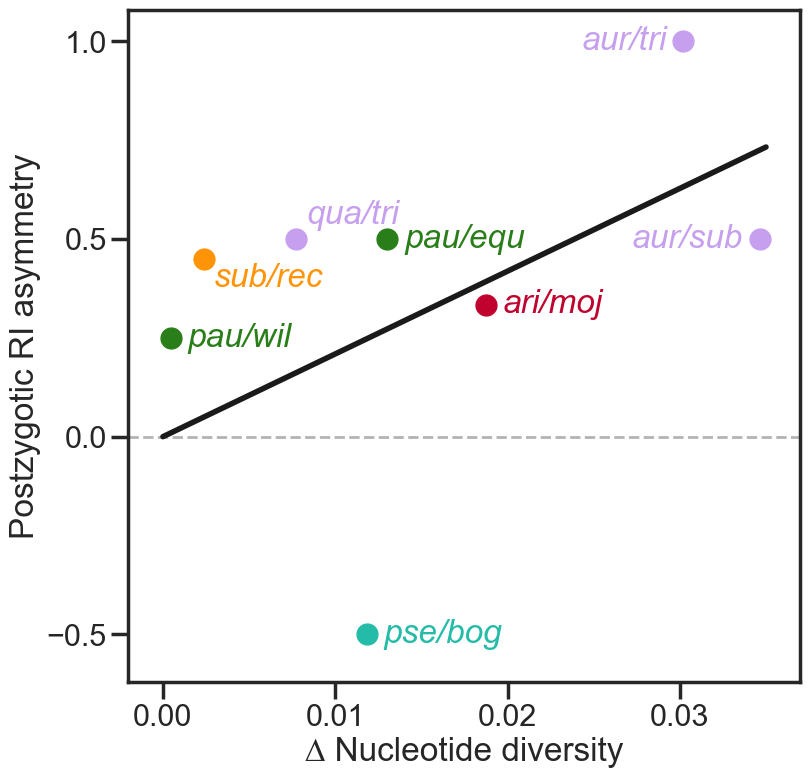

In [9]:
plt.figure()
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.set_position([.15, .13, .84, .84])
ax.plot([-.002, .037], [0] * 2, '--', color='0.7', lw=2)
cols = {'repleta': 'lipstick red', 'montium': 'lavender', 'willistoni': 'tree green', 'obscura': 'tealish', 'quinaria': 'tangerine'}
# regression through the origin
x = np.linspace(0, .035, 10)
y = 20.937 * x
ax.plot(x, y, color="k", lw=4)
for i in data.index:
    if (data.loc[i, 'pi_asym'] > 0):
        ax.plot(data.loc[i, 'pi_asym'], data.loc[i, 'RI_asym'], 'o', color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], ms=15)
        if i in [0, 8]:
            ax.text(data.loc[i, 'pi_asym'] + .001, data.loc[i, 'RI_asym'], '{0}/{1}'.format(data.loc[i, 'sp1'][:3], data.loc[i, 'sp2'][:3]), 
                color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], style='italic', va='center', ha='left') 
        elif i in [1, 2]:
            ax.text(data.loc[i, 'pi_asym'] - .001, data.loc[i, 'RI_asym'], '{0}/{1}'.format(data.loc[i, 'sp1'][:3], data.loc[i, 'sp2'][:3]), 
                color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], style='italic', va='center', ha='right') 
    else:
        ax.plot(-data.loc[i, 'pi_asym'], -data.loc[i, 'RI_asym'], 'o', color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], ms=15)
        if i in [3, 10]:
            ax.text(-data.loc[i, 'pi_asym'] + .001, -data.loc[i, 'RI_asym'], '{1}/{0}'.format(data.loc[i, 'sp1'][:3], data.loc[i, 'sp2'][:3]), 
                color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], style='italic', va='center', ha='left') 
        elif i in [11]:
            ax.text(-data.loc[i, 'pi_asym'] + .0006, -data.loc[i, 'RI_asym'] - .05, '{1}/{0}'.format(data.loc[i, 'sp1'][:3], data.loc[i, 'sp2'][:3]), 
                color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], style='italic', va='center', ha='left') 
        elif i in [14]:
            ax.text(-data.loc[i, 'pi_asym'] + .0006, -data.loc[i, 'RI_asym'] + .06, '{1}/{0}'.format(data.loc[i, 'sp1'][:3], data.loc[i, 'sp2'][:3]), 
                color=sns.xkcd_rgb[cols[data.loc[i, 'group']]], style='italic', va='center', ha='left') 
ax.set_xlabel('∆ Nucleotide diversity')
ax.set_xlim(-.002, .037)
ax.set_ylabel('Postzygotic RI asymmetry')
ax.set_ylim(-.62, 1.08)
ax.set_yticks(np.arange(-.5, 1.1, .5))
fig.savefig('Fig11.pdf');